In [15]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd() , "..")))
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from src import config
warnings.filterwarnings("ignore")

In [44]:
base_dir = os.path.join(os.path.dirname(os.getcwd() ), "..")
csv_path = os.path.abspath(os.path.join("..", config.SET_PATH_DATA))
df = pd.read_csv(csv_path)
df.head(5)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [46]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [48]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

## EDA

In [49]:
df_ve = df.copy(deep = True)
df_ve.head(2)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090

In [59]:
#df_ve.drop("country" , axis = 1 , inplace = True)
print(df_ve.columns , f"T·ªïng s·ªë l∆∞·ª£ng c·ªôt l√† {len(df_ve.columns)}")

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object') T·ªïng s·ªë l∆∞·ª£ng c·ªôt l√† 9


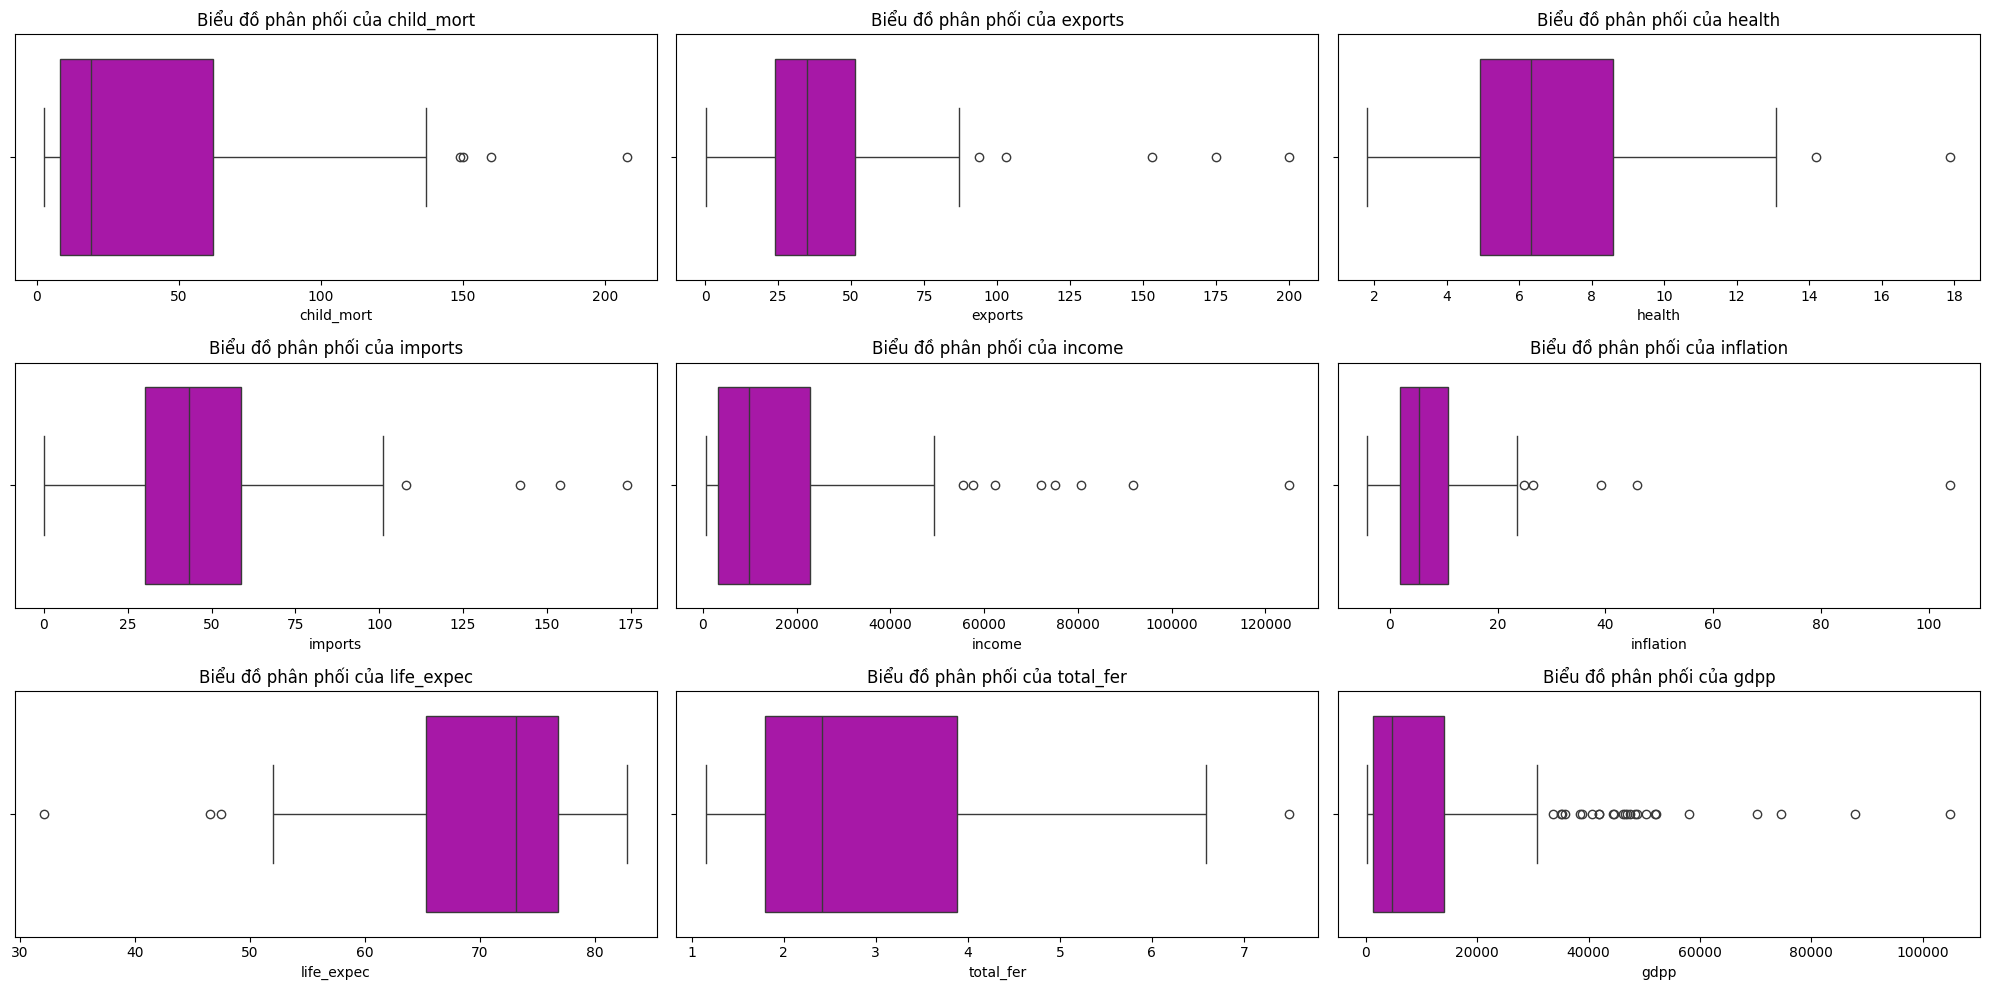

In [80]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve):
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.boxplot(X , ax = axes , color = 'm' , orient='h')
        title = X.name 
        axes.set_title(f"Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·ªßa {title}")
plt.tight_layout()

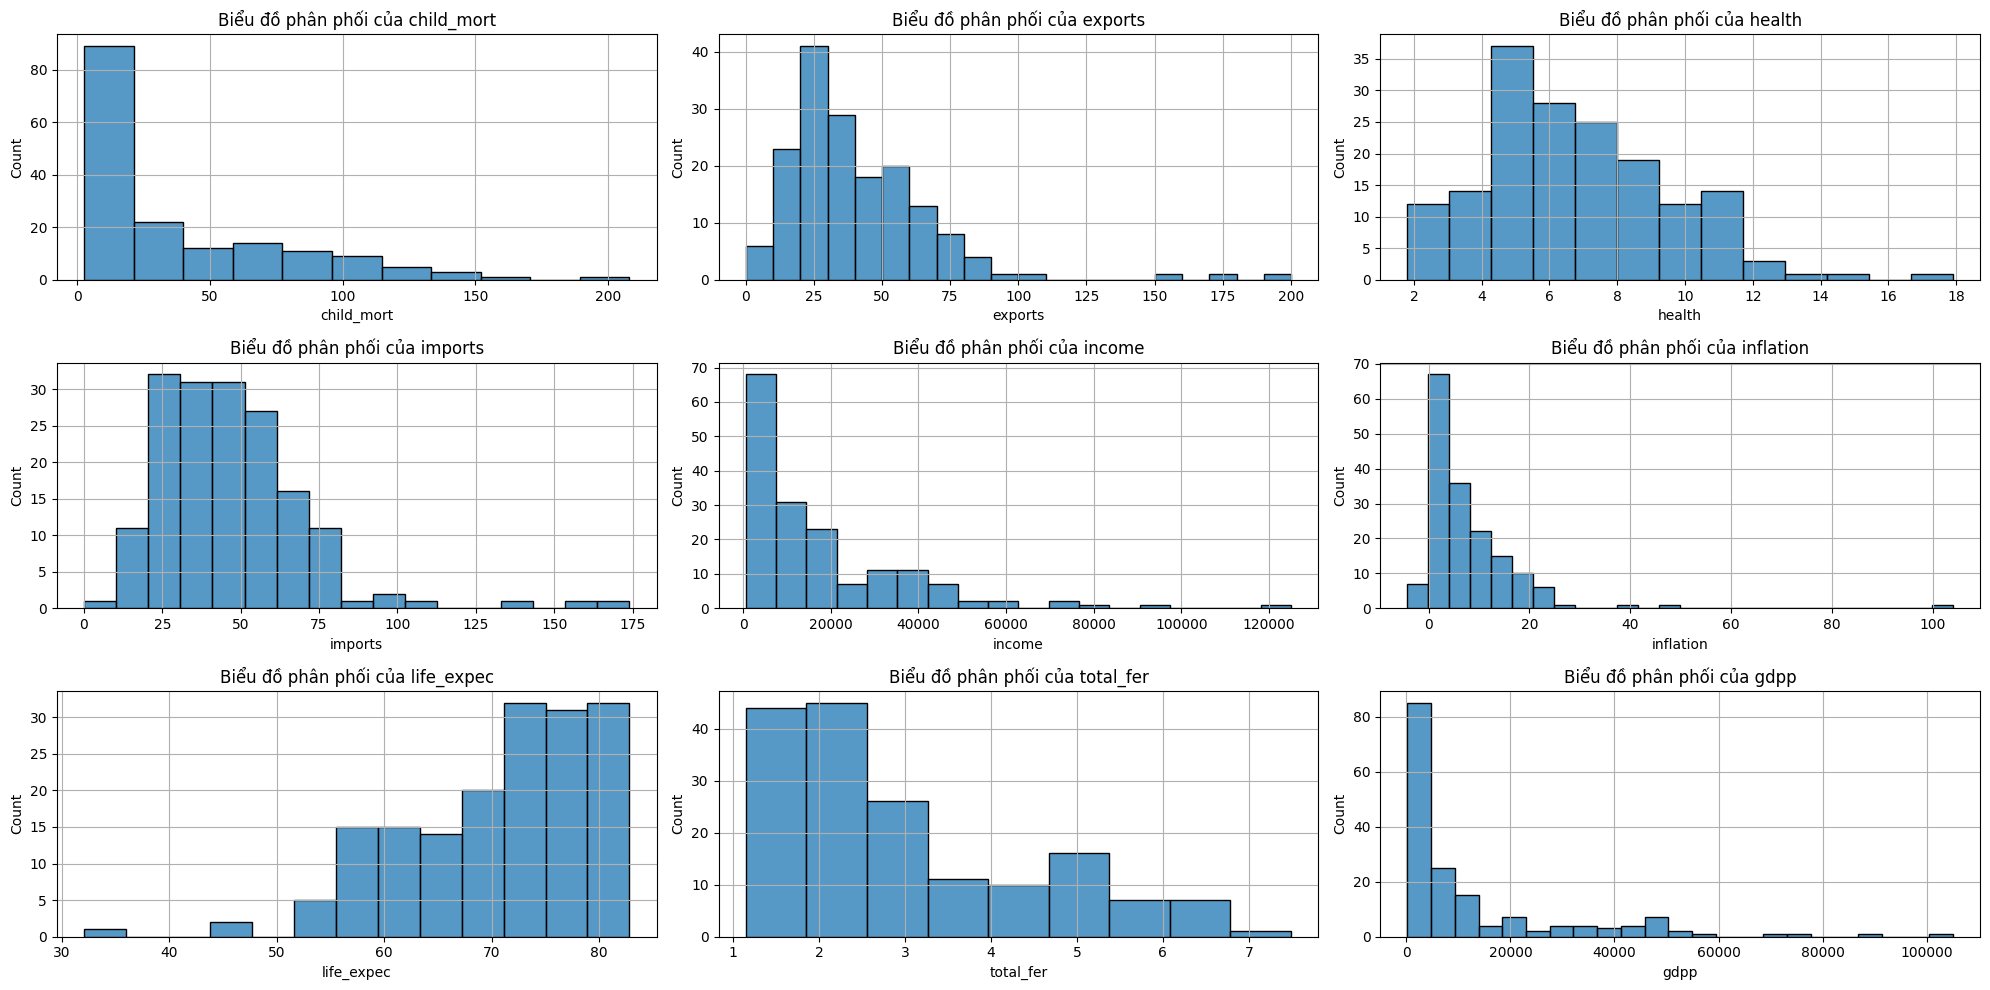

In [85]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve): 
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.histplot(X , ax = axes)
        axes.grid()
        title = X.name
        axes.set_title(f"Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·ªßa {title}")
plt.tight_layout()
        

## Ph√¢n b·ªë d·ªØ li·ªáu

- **Health**: Ph√¢n ph·ªëi g·∫ßn v·ªõi chu·∫©n, v·ªõi ƒë·ªânh ·ªü kho·∫£ng 4‚Äì5.
- **Life expectancy**: Ph√¢n ph·ªëi l·ªách tr√°i ‚Äì ph·∫ßn l·ªõn qu·ªëc gia c√≥ tu·ªïi th·ªç cao, m·ªôt s·ªë √≠t th·∫•p.
- C√°c ch·ªâ s·ªë c√≤n l·∫°i (**child mortality**, **exports**, **imports**, **income**, **inflation**, **total fertility**, **GDP**) ƒë·ªÅu **l·ªách ph·∫£i**, v·ªõi ƒë·ªânh ·ªü m·ª©c th·∫•p v√† ƒëu√¥i k√©o d√†i v·ªÅ ph√≠a c√°c gi√° tr·ªã cao.

## T√¨nh tr·∫°ng kinh t·∫ø v√† x√£ h·ªôi

- **Thu nh·∫≠p b√¨nh qu√¢n ƒë·∫ßu ng∆∞·ªùi** r·∫•t th·∫•p (ƒëa s·ªë d∆∞·ªõi 2000 USD).
- **GDP b√¨nh qu√¢n ƒë·∫ßu ng∆∞·ªùi** c≈©ng th·∫•p ‚Äì ph·∫£n √°nh s·ª± gi√†u c√≥ th·∫•p.
- **C·ªßa c·∫£i v√† thu nh·∫≠p** ph√¢n b·ªï kh√¥ng ƒë·ªìng ƒë·ªÅu, th·ªÉ hi·ªán r√µ qua c√°c gi√° tr·ªã ngo·∫°i l·ªá cao.
- **M·ª©c s·ªëng** kh√¥ng ƒë·ªìng ƒë·ªÅu gi·ªØa c√°c qu·ªëc gia ‚Äì th·ªÉ hi·ªán qua s·ª± ch√™nh l·ªách l·ªõn trong thu nh·∫≠p v√† tu·ªïi th·ªç trung b√¨nh.

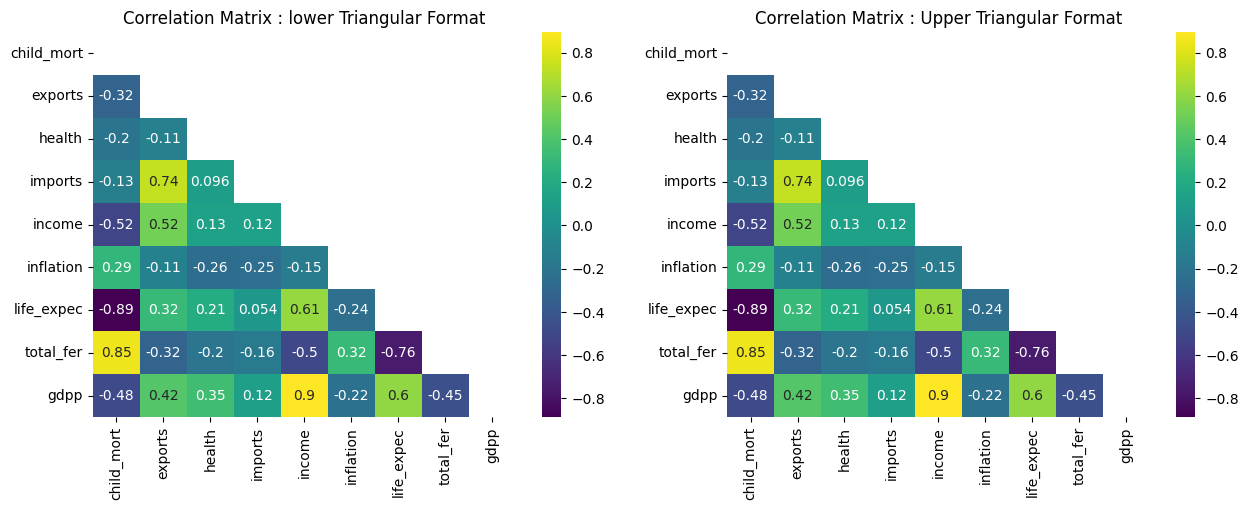

In [93]:
upper_triangle = np.triu(df_ve.corr())
lower_triangle = np.triu(df_ve.corr())

fig , ax = plt.subplots(1,2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df_ve.corr() , mask = lower_triangle , annot=True , cmap = "viridis" , cbar= True)
plt.title('Correlation Matrix : lower Triangular Format')
plt.subplot(1,2,2 )
sns.heatmap(df_ve.corr() , cmap = 'viridis' , annot= True , mask =upper_triangle , cbar = True)
plt.title('Correlation Matrix : Upper Triangular Format')
plt.show()

## üß† Ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa c√°c ƒë·∫∑c tr∆∞ng v√† t√¨nh tr·∫°ng qu·ªëc gia

### üìâ ·∫¢nh h∆∞·ªüng c·ªßa ƒëi·ªÅu ki·ªán kinh t·∫ø ƒë·∫øn s·ª©c kh·ªèe v√† d√¢n s·ªë

- **T·ª∑ l·ªá tr·∫ª t·ª≠ vong cao** th∆∞·ªùng x·∫£y ra khi:
  - `income`, `life_expec`, `gdpp`, `exports` **gi·∫£m**.
  - `inflation` **tƒÉng**.
- ƒêi·ªÅu n√†y cho th·∫•y **ƒëi·ªÅu ki·ªán kinh t·∫ø ·∫£nh h∆∞·ªüng nghi√™m tr·ªçng** ƒë·∫øn s·ª©c kh·ªèe v√† tu·ªïi th·ªç c·ªßa ng∆∞·ªùi d√¢n.
- `inflation` tƒÉng ‚Üí **t·ª∑ l·ªá t·ª≠ vong v√† t·ª∑ l·ªá sinh ƒë·ªÅu tƒÉng** ‚áí ph·∫£n √°nh c√°c **qu·ªëc gia k√©m ph√°t tri·ªÉn**.

### üåç Vai tr√≤ c·ªßa xu·∫•t nh·∫≠p kh·∫©u

- Khi `exports` **tƒÉng**:
  - `gdpp`, `imports`, `life_expec` **tƒÉng**.
  - `child_mort` v√† `total_fer` **gi·∫£m**.
- Cho th·∫•y **xu·∫•t nh·∫≠p kh·∫©u ƒë√≥ng vai tr√≤ quan tr·ªçng** trong vi·ªác th√∫c ƒë·∫©y tƒÉng tr∆∞·ªüng kinh t·∫ø v√† c·∫£i thi·ªán ch·∫•t l∆∞·ª£ng cu·ªôc s·ªëng.

---

### üèÅ K·∫øt lu·∫≠n: 3 nh√≥m ƒë·∫∑c tr∆∞ng ch√≠nh ƒë√°nh gi√° t√¨nh tr·∫°ng qu·ªëc gia

| Nh√≥m ƒë·∫∑c tr∆∞ng | Thu·ªôc t√≠nh li√™n quan                                      | √ù nghƒ©a t·ªïng quan                         |
|----------------|-----------------------------------------------------------|-------------------------------------------|
| **Health**     | `child_mort`, `life_expec`, `health` , `total_fer`                    | Ph·∫£n √°nh s·ª©c kh·ªèe v√† tu·ªïi th·ªç d√¢n c∆∞     |
| **Trade**      | `exports`, `imports`                                      | ƒêo l∆∞·ªùng m·ª©c ƒë·ªô m·ªü c·ª≠a v√† h·ªôi nh·∫≠p qu·ªëc t·∫ø |
| **Finance**    | `income`, `gdpp`, `inflation`                             | ƒê√°nh gi√° nƒÉng l·ª±c t√†i ch√≠nh v√† ·ªïn ƒë·ªãnh vƒ© m√¥ |

=> D·ª±a tr√™n ba nh√≥m n√†y, c√≥ th·ªÉ **suy ra m·ª©c ƒë·ªô ph√°t tri·ªÉn v√† t√¨nh tr·∫°ng s·ªëng c·ªßa m·ªôt qu·ªëc gia** m·ªôt c√°ch t∆∞∆°ng ƒë·ªëi ch√≠nh x√°c.


In [92]:
df1 = pd.DataFrame()
df1['Trade'] = (df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean())
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean())
df1['Finance'] = (df['income'] / df['income'].mean()) + (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean())
df1.head()

Trade    Health   Finance
0  1.200812  6.239852  1.349645
1  1.717580  3.035901  1.471658
2  1.603752  3.389763  3.165367
3  2.430387  6.469020  3.494919
4  2.362940  2.964898  2.240150